<a href="https://colab.research.google.com/github/keyurshah710/data-science-with-python/blob/main/Classification_model_for_the_diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np

In [2]:
#1. Read the diamonds_clean.csv data into a dataframe and display the first 10 rows.

df=pd.read_csv("/content/drive/MyDrive/Independent Study/diamonds_clean.csv")
df.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#2. Split the data into training and testing data sets, where the testing data set consists of 20% of the total data.
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Training set shape:", X_train.shape)
print("X Testing set shape:", X_test.shape)


X Training set shape: (43136, 9)
X Testing set shape: (10784, 9)


In [5]:
#3. Create an initial classification DECISION TREE MODEL, use default values for the hyperparameters.
X = df.drop('Price', axis=1)
y = df['Price']

# Perform encoding on each columns
X_encoded = pd.get_dummies(X)

# Split the encoded data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.16246290801186944


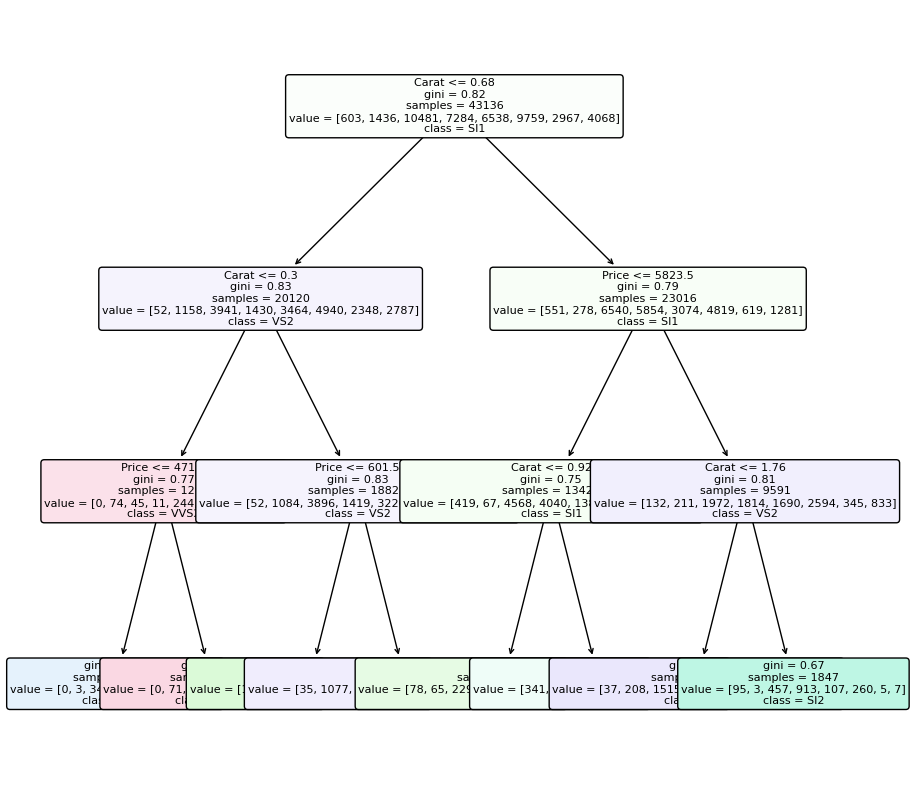

In [6]:
#4. Fit the model to predict the Clarity variable using all independent variables and view it.

# Extract the features(X) and the target variable(y)
X = df.drop('Clarity', axis=1)
y = df['Clarity']

# Perform encoding on columns
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3)

clf.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, feature_names=X_encoded.columns, class_names=clf.classes_,filled=True,fontsize=8, rounded=True,precision=2,ax=ax)

plt.show()


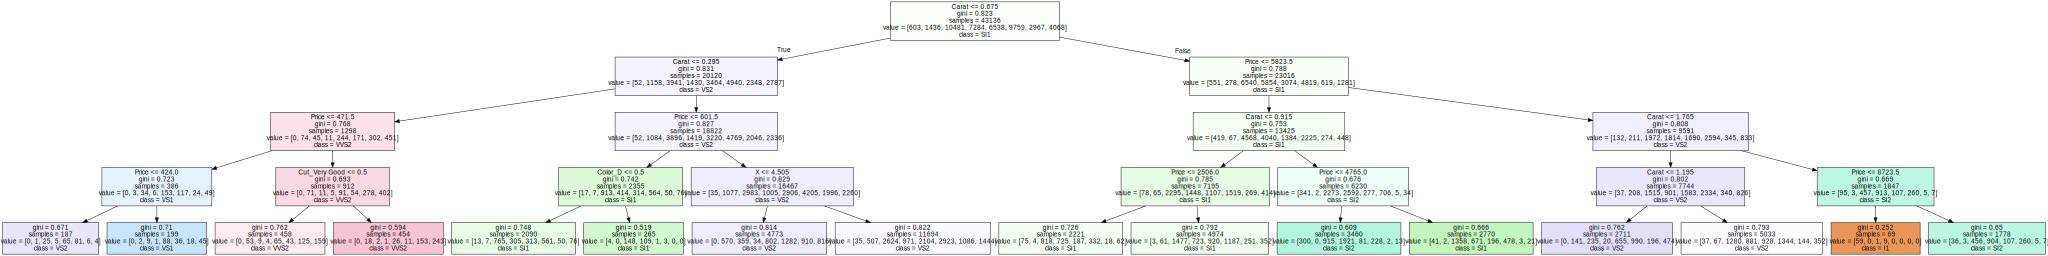

In [7]:
#5. Plot the fitted decision tree.


X = df.drop('Clarity', axis=1)
y = df['Clarity']

X_encoded = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create the decision tree classifier with max_depth
clf = DecisionTreeClassifier(max_depth=4)


clf.fit(X_train, y_train)

# Plot the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_encoded.columns, class_names=clf.classes_, filled=True)
graph = graphviz.Source(dot_data)
#graph.render("decision_tree")  # for exporting file in PDF format
graph

In [8]:
#6. Use the model to get predictions for the test data set.

y_pred = clf.predict(X_test)

print("Predicted values:", y_pred)


Predicted values: ['VS2' 'VS2' 'VS2' ... 'VS2' 'SI1' 'VS2']


In [9]:
#7.  Display a confusion matrix for this model.

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[   7    0   39   70    0   19    0    0]
 [   0    0   22    1    0  313    0   18]
 [   1    0 1066  372    1 1138    0    4]
 [   3    0  679  754    0  465    0    0]
 [   0    0  391   50   17 1144    0   30]
 [   0    0  678  119   10 1674    0   14]
 [   0    0   62    2    7  550    0   66]
 [   0    0  107    8    7  780    0   96]]


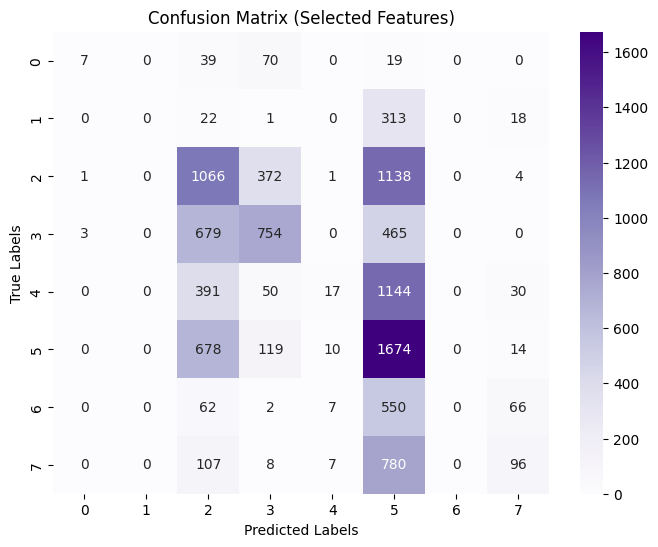

In [10]:
#same as above but using plot

cm_selected = confusion_matrix(y_test, y_pred)

# Plot for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (Selected Features)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [11]:
#8.  Display the variables for this model sorted by importance.
imp = clf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': imp})

# Sort the features by importance in desc order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)


Feature Importances:
          Feature  Importance
0           Carat    0.561466
3           Price    0.358380
4               X    0.058075
12        Color_D    0.017202
11  Cut_Very Good    0.004876
17        Color_I    0.000000
16        Color_H    0.000000
15        Color_G    0.000000
14        Color_F    0.000000
13        Color_E    0.000000
9       Cut_Ideal    0.000000
10    Cut_Premium    0.000000
1           Depth    0.000000
8        Cut_Good    0.000000
7        Cut_Fair    0.000000
6               Z    0.000000
5               Y    0.000000
2           Table    0.000000
18        Color_J    0.000000


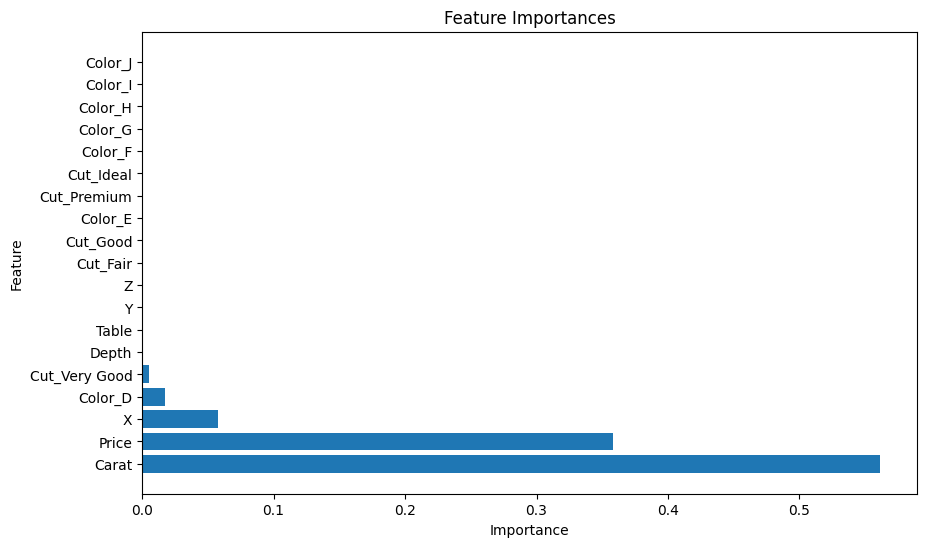

In [12]:
##8.  Display the variables for this model sorted by importance. USING BAR CHART
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot for the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [13]:
#9.  Create a new decision tree model, but this time set the hyperparameters set manually. (Larger values for tree_depth and smaller values for min_n and cost_complexity should help your model).
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=5, ccp_alpha=0.001)

clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.43184347181008903


In [14]:
#10.  Fit the new model to use two important variables from the previous model.
X_selected = X_encoded[['Carat', 'Price']]

X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

clf_selected = DecisionTreeClassifier(max_depth=10, min_samples_split=5, ccp_alpha=0.001)

clf_selected.fit(X_train_selected, y_train)

# Make predictions on the test data with the selected features
y_pred_selected = clf_selected.predict(X_test_selected)

accuracy_selected = clf_selected.score(X_test_selected, y_test)
print("Accuracy (Selected Features):", accuracy_selected)

Accuracy (Selected Features): 0.40254080118694363


In [15]:
#11.  Get a new set of predictions for the testing data using the new model.
y_pred_selected = clf_selected.predict(X_test_selected)


print("Predicted values (Selected Features):", y_pred_selected)

Predicted values (Selected Features): ['IF' 'VS2' 'SI1' ... 'SI2' 'SI1' 'VS2']


Predicted values (Selected Features): ['IF' 'VS2' 'SI1' ... 'SI2' 'SI1' 'VS2']


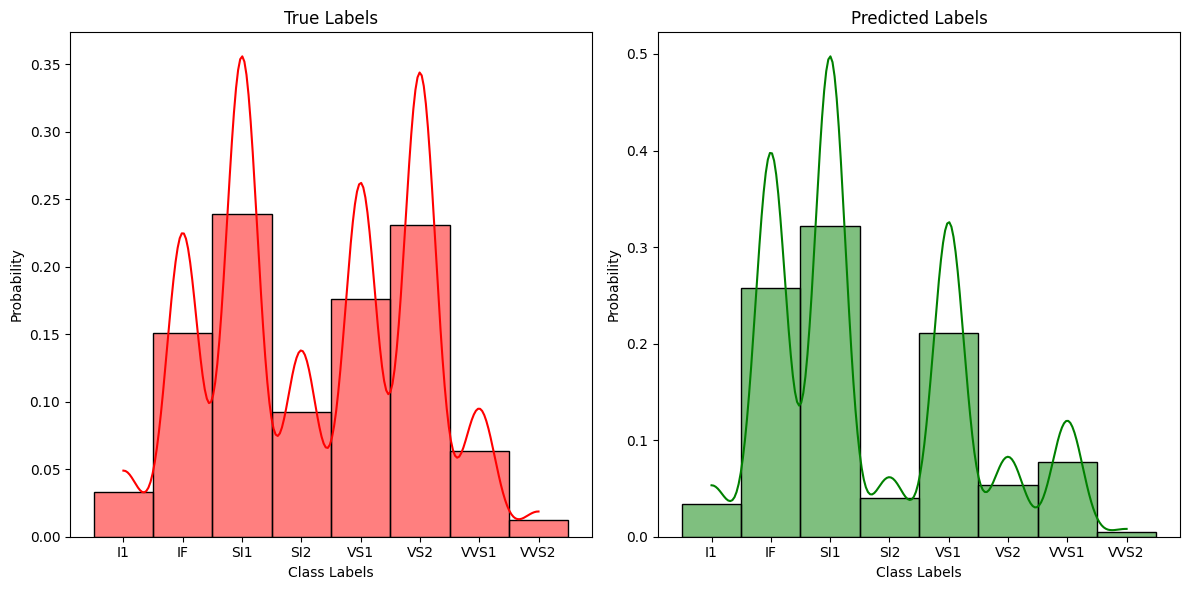

In [16]:
#11.  Get a new set of predictions for the testing data using the new model. USING PLOT
# Print the predicted values
print("Predicted values (Selected Features):", y_pred_selected)

# Create an array of class labels
classes = np.unique(y)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))


# Plot the true labels
sns.histplot(data=y_test, ax=axs[0], kde=True, stat="probability", color="red", label="True Labels")
axs[0].set_title("True Labels")
axs[0].set_xlabel("Class Labels")
axs[0].set_ylabel("Probability")

# Plot the predicted labels
sns.histplot(data=y_pred_selected, ax=axs[1], kde=True, stat="probability", color="green", label="Predicted Labels")
axs[1].set_title("Predicted Labels")
axs[1].set_xlabel("Class Labels")
axs[1].set_ylabel("Probability")

# Set the x-axis ticks to match the class labels
axs[0].set_xticks(range(len(classes)))
axs[1].set_xticks(range(len(classes)))
axs[0].set_xticklabels(classes)
axs[1].set_xticklabels(classes)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

In [17]:
#12.  Display a confusion matrix for the new model. Did your accuracy improve? If not, try adjusting the hyperparameters again. A few sentences here will be enough.
cm_selected = confusion_matrix(y_test, y_pred_selected)

print("Confusion Matrix (Selected Features):")
print(cm_selected)



# accuracy it is improve becasue confusion matrix (all features) has low accuracy rate while selected features has higher accuracy rate.
#This improvement shows that feature selection is vital for improving model accuracy and minimizing noise from potentially irrelevant features.

Confusion Matrix (Selected Features):
[[  40    0   17   78    0    0    0    0]
 [   0  111   14    2   19   65   58   85]
 [   4    0 1392  653   72  442   10    9]
 [  12    0  708 1144    3   34    0    0]
 [   0   21  394  113  184  663  109  148]
 [   0   84  794  256  182 1045   57   77]
 [   0  101   48    5   48  191  100  194]
 [   0   53  102   22   68  335   93  325]]


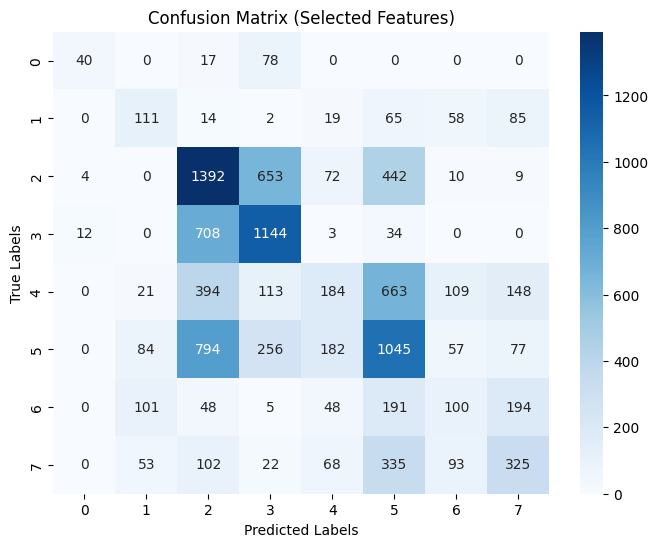

In [18]:
#same as Above but USING PLOT
cm_selected = confusion_matrix(y_test, y_pred_selected)

# Plot  for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Selected Features)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()